<a href="https://colab.research.google.com/github/cristripoli/Codility/blob/master/eda_univariate_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Before we start, a little bit of context.

Here, we gonna use the *mobile_prices* dataset (adapted from: https://www.kaggle.com/iabhishekofficial/mobile-price-classification).

It is a dataset about the specifications of different mobile devices, such as cell phones, smartphones and tablets. The dataset originally had a total of 2000 rows and 13 columns. Each row represents a mobile device, while the columns represent the collected specs.

# Univariate analysis

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

The goal of the univariate analysis is individually analyze each variable in the dataset, classify them as qualitative and quantitative, obtain charts and measures that summarize their behavior, etc.

> **Note**
>
> We call the columns of our dataset variable or attribute.
>
> For example, in the case of a dataset that has the columns: `name | age | weight`,
> each of these columns is a variable.
>
> The term variable comes from a statistical bias (ie, random variables). The term attribute, on the other hand, has a bias from the machine learning community.

## Data Types

The first step in Exploratory Data Analysis is to identify **what types of variables we will work with**.

We divided the data into 2 types (that also have their divisions): qualitative and quantitative!

### Qualitative Data
Qualitative data is data that represents properties (or categories/classes). For example, sex, blood type, eye color are qualities of a person.

Qualitative data is divided into two ways:

- **Nominal data.** Data whose categories do not have a defined order or scale for them. For example, the _blue_ eye color is no greater than the _green_ color.
- **Ordinal data.** Data whose categories have a defined order or scale for them. For example, we can have a variable that expresses how hot the day is and the possible values (categories) are: "Very Cold", "Cold", "Warm", "Very Hot". Note that we have an order relationship between categories. After all, "Cold" is hotter than "Very Cold" and less hot than "Hot".

> Some authors also include the "binary" type.
>
> The binary type is nothing more than a nominal qualitative variable with only two categories.

### Quantitative Data
Quantitative data are numerical values that represent quantities. For example height, weight, age.

Quantitative data is divided into two ways:

- **Discrete.** Integer numeric values, such as: -2, -1, 0, 1, 2, ...

- **Continuous.** Numeric values with decimal places, such as: 1.34, 1.61, 2.54

By importing our dataset and printing it to the screen, we can already get some insight into the data type of each column.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/daitan-innovation/daitan-ml-course-resources/main/raw.csv")

In [ ]:
df

,battery_power,battery_duration,clock_speed,n_cores,storage,ram,principal_camera,wifi,4G,weight,price,operating_system,brand
0,800,18,2.2,2,4,2GB,1.0,1,False,27,1334.153600,Android,Motorola
1,1000,66,0.5,2,32,2GB,4.0,0,True,81,1214.824488,iOS,Apple
2,500,20,0.5,4,32,2GB,2.0,0,True,520,1497.645431,iOS,Apple
3,600,4,2.5,4,8,2GB,4.0,0,False,635,1372.170792,iOS,Apple
4,1800,75,1.2,2,32,1GB,13.0,0,True,365,805.788544,Android,Motorola
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,700,23,0.5,4,2,0.512GB,2.0,0,True,772,1438.519158,Android,LG
1996,1900,18,2.6,4,32,1GB,2.0,1,False,293,957.569984,iOS,Apple
1997,1900,26,0.9,8,32,2GB,1.0,0,True,688,1047.130936,Android,Xiaomi
1998,1500,33,0.9,4,32,0.512GB,4.0,1,True,573,1273.602061,iOS,Apple


To start with, we can sort each column as follows:

- **`battery_power`.** Discrete Qualitative
- **`battery_duration.`** Discrete Qualitative
- **`clock_speed`.** Continuous Quantitative
- **`n_cores`.** Qualitative Ordinal*
- **`storage`.** Qualitative Ordinal*
- **`ram`.** Qualitative Ordinal*
- **`principal_camera`.** Discrete Quantitative
- **`wifi`.** Nominal Qualitative (Binary)
- **`4G`.** Nominal Qualitative (Binary)
- **`weight`** Discrete Quantitative
- **`price`.** Continuous Quantitative
- **`operating_system`.** Nominal Qualitative
- **`brand`.** Nominal Qualitative

However, this classification may generate some doubts.

1. When is a variable discrete or ordinal?
2. What ensures that all my data is represented as the sorted type? For example, we can find a value of `701.10` in `battery_power`.


## Discrete vs Ordinal

Categorization between discrete and ordinal depends on your data domain, your domain knowledge as an analyst, and how you intend to interpret the variable in question.

In our case, it may be more interesting to interpret the amount of RAM memory on a mobile device as ordinal, because:

- There are few possible values
- These are default values
- By interpreting as ordinal, it is possible to separate devices into different RAM categories.

Battery capacity can contain a wide range of values and we may be interested in identifying questions such as: what is the average battery capacity? what are the first and third quartiles? etc.

## Formatting and Data Consistency

In fact, nothing guarantees that the data we will be working with will be perfectly formatted and consistent. This is exactly why one of the stages in the life cycle of an ML project is **data cleaning**.

From the perspective of exploratory data analysis, we can clean the data both before and after the analysis. Each choice has pros and cons (we'll discuss about them in the **Data Cleansing** section).

However, formatting the data to be consistent for analysis is a critical step in the EDA process.

> Note that data cleaning is more than just formatting!

A common practice to identify possible inconsistencies in the data is to check if the column type matches the way we sort the data. If not, then we do whatever is necessary to format it and leave the data as expected.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   battery_power     2000 non-null   object 
 1   battery_duration  2000 non-null   int64  
 2   clock_speed       2000 non-null   float64
 3   n_cores           2000 non-null   int64  
 4   storage           2000 non-null   int64  
 5   ram               2000 non-null   object 
 6   principal_camera  1989 non-null   float64
 7   wifi              2000 non-null   int64  
 8   4G                2000 non-null   bool   
 9   weight            2000 non-null   int64  
 10  price             2000 non-null   float64
 11  operating_system  2000 non-null   object 
 12  brand             2000 non-null   object 
dtypes: bool(1), float64(3), int64(5), object(4)
memory usage: 189.6+ KB


- `battery_power` should be `int64`, but is `object`. That means there is some letter between the data.
- `principal_camera` should be `int64`, but is `float64`. This means that there might be some decimal entry in the data.

Still, we can reflect on what is the best representation of the variables `ram`  and `wifi`/`4G`.

In case of `wifi`/`4G`, the first is represented as values `1` and `0`, while `4G` is represented as `True` and `False`.  Both representations are acceptable, but the fact that they are the same type (binary), but represented in different ways can be a cause for confusion. So, a good practice is to choose a single way to represent them.

In the case of the `ram` column, we know that its interpretation must be **ordinal**. However, due to the unit of measure (`GB`), *pandas* interprets the column as textual data. Also, even if we remove the unit of measure, the data is still represented in decimal notation. So what to do?

- Since the main point is to leave the data formatted in a consistent way, as long as the analyst understands that it is an ordinal data and its formatting is consistent, any representation is valid.


In [ ]:
# Dealing with battery_power

df["battery_power"]

0        800
1       1000
2        500
3        600
4       1800
        ... 
1995     700
1996    1900
1997    1900
1998    1500
1999     500
Name: battery_power, Length: 2000, dtype: object

In [ ]:
def to_int(value):
    try:
        return int(value)
    except ValueError:
        print(value)
        # power_without_unit = value.replace("mAh", "")
        # print(power_without_unit)
        # return int(power_without_unit)

In [ ]:
df["battery_power"].map(to_int)

600mAh
1500mAh
1100mAh
1400mAh
900mAh
1100mAh
700mAh
1200mAh
1700mAh
1300mAh


0        800.0
1       1000.0
2        500.0
3        600.0
4       1800.0
         ...  
1995     700.0
1996    1900.0
1997    1900.0
1998    1500.0
1999     500.0
Name: battery_power, Length: 2000, dtype: float64

In [ ]:
df["battery_power"] = df["battery_power"].map(to_int)
df["battery_power"]

600mAh
1500mAh
1100mAh
1400mAh
900mAh
1100mAh
700mAh
1200mAh
1700mAh
1300mAh


0        800.0
1       1000.0
2        500.0
3        600.0
4       1800.0
         ...  
1995     700.0
1996    1900.0
1997    1900.0
1998    1500.0
1999     500.0
Name: battery_power, Length: 2000, dtype: float64

In [ ]:
# Dealing with principal_camera

df["principal_camera"].map(to_int)

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


0        1.0
1        4.0
2        2.0
3        4.0
4       13.0
        ... 
1995     2.0
1996     2.0
1997     1.0
1998     4.0
1999     5.0
Name: principal_camera, Length: 2000, dtype: float64

In [ ]:
df["principal_camera"] = df["principal_camera"].fillna(-1)

In [ ]:
df["principal_camera"] = df["principal_camera"].astype(int)

In [ ]:
df["wifi"]

0       1
1       0
2       0
3       0
4       0
       ..
1995    0
1996    1
1997    0
1998    1
1999    1
Name: wifi, Length: 2000, dtype: int64

In [ ]:
df["wifi"] = df["wifi"].astype(bool)
df["wifi"]

0        True
1       False
2       False
3       False
4       False
        ...  
1995    False
1996     True
1997    False
1998     True
1999     True
Name: wifi, Length: 2000, dtype: bool

In [ ]:
def remove_unit(value, unit):
    return float(value.replace(unit, ""))

In [ ]:
df["ram"].apply(remove_unit, unit="GB")

0       2.000
1       2.000
2       2.000
3       2.000
4       1.000
        ...  
1995    0.512
1996    1.000
1997    2.000
1998    0.512
1999    2.000
Name: ram, Length: 2000, dtype: float64

In [ ]:
df["ram"] = df["ram"].apply(remove_unit, unit="GB")
df["ram"]

0       2.000
1       2.000
2       2.000
3       2.000
4       1.000
        ...  
1995    0.512
1996    1.000
1997    2.000
1998    0.512
1999    2.000
Name: ram, Length: 2000, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   battery_power     1990 non-null   float64
 1   battery_duration  2000 non-null   int64  
 2   clock_speed       2000 non-null   float64
 3   n_cores           2000 non-null   int64  
 4   storage           2000 non-null   int64  
 5   ram               2000 non-null   float64
 6   principal_camera  2000 non-null   int64  
 7   wifi              2000 non-null   bool   
 8   4G                2000 non-null   bool   
 9   weight            2000 non-null   int64  
 10  price             2000 non-null   float64
 11  operating_system  2000 non-null   object 
 12  brand             2000 non-null   object 
dtypes: bool(2), float64(4), int64(5), object(2)
memory usage: 175.9+ KB


Another common inconsistency behavior is values out of possible ranges. For example, negative values in `battery_power` or `clock_speed` (impossible case).
In situations like this we can choose:

- Remove inconsistent data
- Mark them as inconsistent with a fixed value
- Replace them with a null value and later use some data imputation technique.

In general, data removal takes place in the data cleaning step, as does the imputation process. So, it is a reasonable practice to simply mark the data as "inconsistent" for analysis purposes.

In [ ]:
# The columns battery_duration, weight, price
# have negative values that should not occur

df.describe()

,battery_power,battery_duration,clock_speed,n_cores,storage,ram,principal_camera,weight,price
count,1990.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1189.497487,37.945500,1.522250,4.174000,23.329500,1.40976,5.768500,475.814000,1196.181867
std,437.869572,51.049246,0.816004,2.483507,24.784957,0.65578,4.082676,248.271178,492.474951
min,500.000000,-9.000000,0.500000,1.000000,2.000000,0.25600,-1.000000,-511.000000,-470.743530
25%,800.000000,10.000000,0.700000,2.000000,16.000000,1.00000,2.000000,314.000000,855.411965
50%,1200.000000,20.000000,1.500000,4.000000,32.000000,2.00000,5.000000,475.000000,1186.738119
75%,1600.000000,46.000000,2.200000,8.000000,32.000000,2.00000,8.000000,643.000000,1537.986535
max,1900.000000,380.000000,3.000000,8.000000,512.000000,2.00000,19.000000,1187.000000,2777.170980


In [ ]:
df[df["battery_duration"] < 0]

,battery_power,battery_duration,clock_speed,n_cores,storage,ram,principal_camera,wifi,4G,weight,price,operating_system,brand
16,800.0,-6,0.5,8,8,2.000,1,True,True,375,1094.959735,Android,Samsung
348,800.0,-7,1.0,1,32,2.000,7,False,True,937,-10.783257,iOS,Apple
507,500.0,-8,0.5,2,8,2.000,7,True,False,828,314.496275,iOS,Apple
609,1200.0,-9,2.6,4,32,2.000,1,True,True,466,1899.948722,Android,Xiaomi
1302,1900.0,-9,2.6,4,4,0.512,5,True,False,265,2068.425971,Android,Xiaomi
1308,1400.0,-6,1.3,2,4,2.000,2,True,True,704,930.725231,iOS,Apple
1661,1900.0,-8,0.5,4,8,0.512,10,False,False,606,1229.556794,Android,Asus
1981,1400.0,-8,2.6,2,4,1.000,8,True,False,654,583.511500,Android,Asus


In [ ]:
df.loc[df["battery_duration"] < 0, "battery_duration"] = -1

In [ ]:
df[df["battery_duration"] < 0]

,battery_power,battery_duration,clock_speed,n_cores,storage,ram,principal_camera,wifi,4G,weight,price,operating_system,brand
16,800.0,-1,0.5,8,8,2.000,1,True,True,375,1094.959735,Android,Samsung
348,800.0,-1,1.0,1,32,2.000,7,False,True,937,-10.783257,iOS,Apple
507,500.0,-1,0.5,2,8,2.000,7,True,False,828,314.496275,iOS,Apple
609,1200.0,-1,2.6,4,32,2.000,1,True,True,466,1899.948722,Android,Xiaomi
1302,1900.0,-1,2.6,4,4,0.512,5,True,False,265,2068.425971,Android,Xiaomi
1308,1400.0,-1,1.3,2,4,2.000,2,True,True,704,930.725231,iOS,Apple
1661,1900.0,-1,0.5,4,8,0.512,10,False,False,606,1229.556794,Android,Asus
1981,1400.0,-1,2.6,2,4,1.000,8,True,False,654,583.511500,Android,Asus


In [ ]:
df.loc[df["weight"] < 0, "weight"] = -1
df.loc[df["principal_camera"] < 0, "principal_camera"] = -1
df.loc[df["price"] < 0, "price"] = -1

## Descriptive statistics

Descriptive statistics are the most basic way to extract information from data. Basically, these are measures that summarize (in a way) the data we're working on.

Dividimos as medidas descritivas em dois tipos: medidas de tendência central e medidas de dispersão.

We divide descriptive statistics into two types: measures of central tendency and measures of dispersion.

### Central tendency measures

Measures of central tendency are those that show what value the data tends towards.

- Mean 
- Median
- mode
- Weighted average
- Quantiles

### Dispersion Measures
Dispersion measures are those that show how dispersed the data is relative to a central value.

- Variance
- standard deviation 

## Describe

`pandas` gives us the `describe` method that returns, for each numeric variable:

- Counting the number of samples
- Mean
- Standard deviation
- Minimum value
- First quartile
- Second quartile
- Third quartile
- Maximum value

In [ ]:
quantitative_cols = ["battery_power", "battery_duration", "clock_speed", "principal_camera", "weight", "price"]
df[quantitative_cols].describe()

,battery_power,battery_duration,clock_speed,principal_camera,weight,price
count,1990.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1189.497487,37.972000,1.522250,5.768500,478.329500,1197.066666
std,437.869572,51.027239,0.816004,4.082676,242.237056,490.033043
min,500.000000,-1.000000,0.500000,-1.000000,-1.000000,-1.000000
25%,800.000000,10.000000,0.700000,2.000000,314.000000,855.411965
50%,1200.000000,20.000000,1.500000,5.000000,475.000000,1186.738119
75%,1600.000000,46.000000,2.200000,8.000000,643.000000,1537.986535
max,1900.000000,380.000000,3.000000,19.000000,1187.000000,2777.170980


Também podem consultar as medidas através dos seus próprios métodos

In [ ]:
df.loc[df["battery_duration"] >= 0, "battery_duration"].describe()

count    1992.000000
mean       38.128514
std        51.069698
min         2.000000
25%        10.000000
50%        21.000000
75%        46.000000
max       380.000000
Name: battery_duration, dtype: float64

In [ ]:
df.loc[df["battery_duration"] >= 0, "battery_duration"].mean(), df.loc[df["battery_duration"] >= 0, "battery_duration"].std()

(38.1285140562249, 51.06969809472631)

In [ ]:
df.loc[df["battery_duration"] >= 0, "battery_duration"].median()

21.0

In [ ]:
df.loc[df["battery_duration"] >= 0, "battery_duration"].min(), df.loc[df["battery_duration"] >= 0, "battery_duration"].max()

(2, 380)

In [ ]:
df.loc[df["battery_duration"] >= 0, "battery_duration"].describe()

count    1992.000000
mean       38.128514
std        51.069698
min         2.000000
25%        10.000000
50%        21.000000
75%        46.000000
max       380.000000
Name: battery_duration, dtype: float64

As for the qualitative variables, it is common to consult a table of frequency values together with the mode.

In [ ]:
qualitative_cols = ["n_cores", "storage", "ram", "wifi", "4G", "operating_system", "brand"]
df[qualitative_cols].mode()

,n_cores,storage,ram,wifi,4G,operating_system,brand
0,4,32,2.0,True,True,Android,Apple


In [ ]:
df["n_cores"].value_counts()

4    750
8    515
2    493
1    242
Name: n_cores, dtype: int64

In [ ]:
df["ram"].value_counts()

2.000    1054
1.000     540
0.512     264
0.256     142
Name: ram, dtype: int64

In [ ]:
df["storage"].value_counts()

32     970
16     513
8      280
4      133
2       42
64      30
3       25
256      4
512      3
Name: storage, dtype: int64

In [ ]:
df["brand"].value_counts(normalize=True)

Apple       0.3055
Xiaomi      0.1470
Asus        0.1430
Samsung     0.1425
LG          0.1365
Motorola    0.1255
Name: brand, dtype: float64

## Exploring Data Distribution

While all descriptive measures are interesting overall, it's difficult to get a preview of how data is distributed through them alone. So we turn to graphics.

The amount of graphics that exists is huge! There are different types of graphics for different purposes. From the point of view of exploratory data analysis, the most common are:

- Frequency Charts:
    - Bar Chart / Count (for qualitative variables)
    - Histogram (for quantitative variables)
- Box plot (for quantitative variables)

Frequency graphs are useful for showing the distribution of data.

The *boxplot* is a graph that attempts to express descriptive measures information (i.e., mean, standard deviation, and quantiles) in a visual way.

<AxesSubplot:xlabel='storage', ylabel='count'>

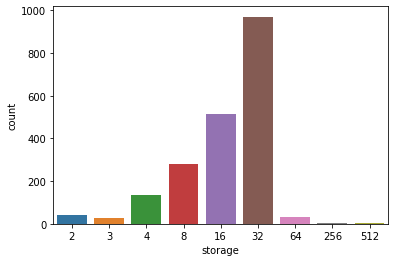

In [ ]:
# Bar Chart

sns.countplot(data=df, x="storage")

<AxesSubplot:xlabel='brand', ylabel='count'>

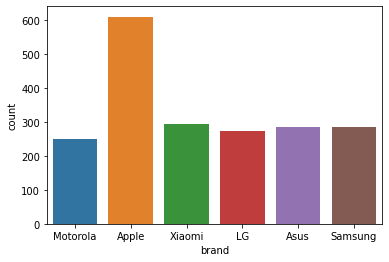

In [ ]:
# Bar Chart

sns.countplot(data=df, x="brand")

<AxesSubplot:xlabel='n_cores', ylabel='count'>

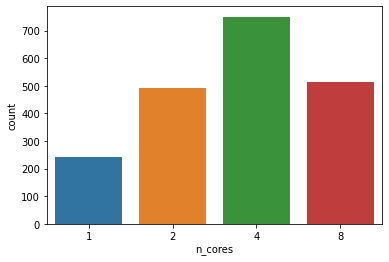

In [ ]:
# Bar Chart

sns.countplot(data=df, x="n_cores")

<AxesSubplot:xlabel='ram', ylabel='count'>

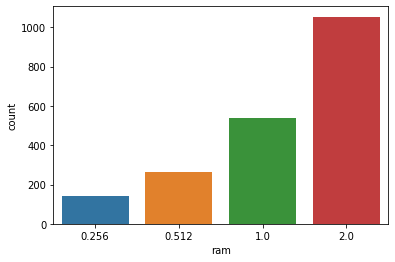

In [ ]:
# Bar Chart

sns.countplot(data=df, x="ram")

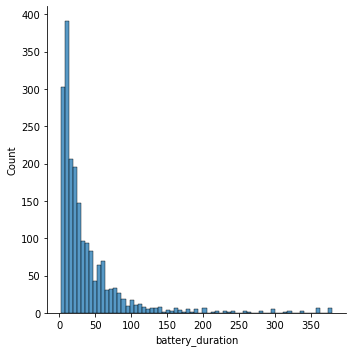

In [ ]:
# Histogram

# sns.displot(data=df, x="battery_duration", bins=10)
sns.displot(data=df[df["battery_duration"]>=0], x="battery_duration")

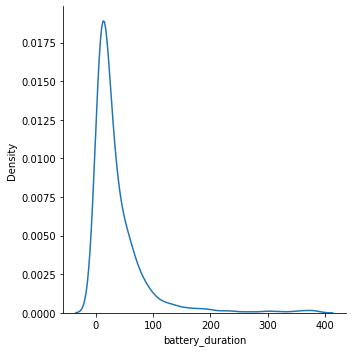

In [ ]:
# Função Densidade de Probabilidade via Kernel Density Estimation (KDE)

sns.displot(data=df, x="battery_duration", kind="kde")

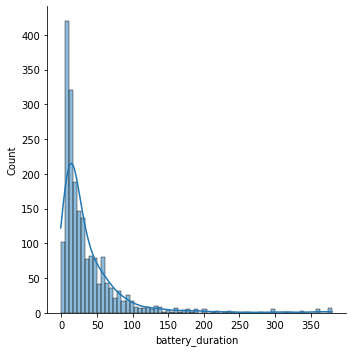

In [ ]:
# Histogram with Probability Density Function

sns.displot(data=df, x="battery_duration", kde=True)

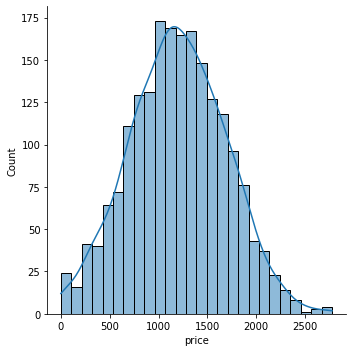

In [ ]:
# Histogram with Probability Density Function

sns.displot(data=df, x="price", kde=True)

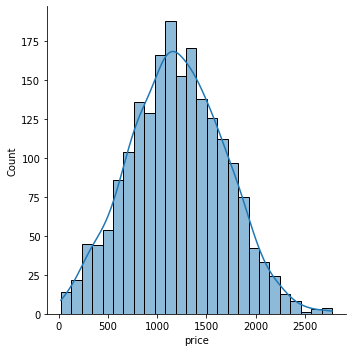

In [ ]:
# Histogram with Probability Density Function

sns.displot(data=df[df["price"] > 0], x="price", kde=True)

<AxesSubplot:xlabel='price'>

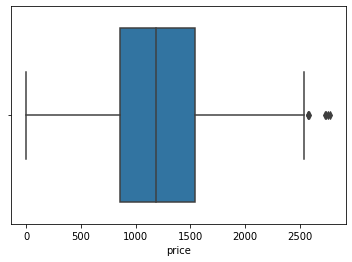

In [ ]:
# Boxplot

sns.boxplot(data=df, x="price")

<AxesSubplot:xlabel='price'>

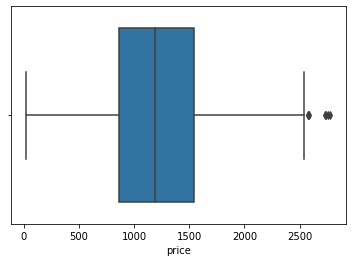

In [ ]:
sns.boxplot(data=df[df["price"] > 0], x="price")

In [ ]:
df.loc[df["price"] > 0, "price"].describe()

count    1988.000000
mean     1204.298456
std       482.557510
min        21.271599
25%       864.100158
50%      1192.646429
75%      1541.903733
max      2777.170980
Name: price, dtype: float64

In [ ]:
# df.to_csv("interim.csv", index=False)

## References

- [Practical Statistics for Data Scientists, 2nd Edition by Peter Bruce et al](https://www.oreilly.com/library/view/practical-statistics-for/9781492072935/)
- [Statistics: The Art and Science of Learning from Data, 4th Edition by Alan Agresti](https://www.pearson.com/us/higher-education/product/Agresti-Statistics-The-Art-and-Science-of-Learning-from-Data-4th-Edition/9780321997838.html)